# ACELERADEV DATASCIENCE 2020 - DESAFIO SEMANA 09

O desafio dessa semana se utilizou do mesmo dataset de notas do enem 2016, aplicado no desafio anterior. Porém, a ideia é desenvolver um modelo de classificação para detectar se o aluno é treineiro ou não.

## IMPORTANDO AS BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
sn.set()

## IMPORTAR OS DATASETS 

In [3]:
#dataset para treinar o modelo
enem_data = pd.read_csv('train.csv')

#dataset para aplicar o modelo
enem_desafio = pd.read_csv('test.csv')

In [4]:
enem_data.shape

(13730, 167)

In [5]:
enem_desafio.shape

(4570, 43)

Nota-se que há colunas que já podem ser descartadas de cara. Vamos dar uma olhada nessas colunas:

### ENEM_DATA

In [6]:
pd.options.display.max_rows = 200
pd.DataFrame({'Features': enem_data.columns,'Tipo de dado':enem_data.dtypes,'Nan("%")':enem_data.isna().sum(axis=0)/len(enem_data)})

,Features,Tipo de dado,"Nan(""%"")"
Unnamed: 0,Unnamed: 0,int64,0.000000
NU_INSCRICAO,NU_INSCRICAO,object,0.000000
NU_ANO,NU_ANO,int64,0.000000
CO_MUNICIPIO_RESIDENCIA,CO_MUNICIPIO_RESIDENCIA,int64,0.000000
NO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,object,0.000000
CO_UF_RESIDENCIA,CO_UF_RESIDENCIA,int64,0.000000
SG_UF_RESIDENCIA,SG_UF_RESIDENCIA,object,0.000000
NU_IDADE,NU_IDADE,int64,0.000000
TP_SEXO,TP_SEXO,object,0.000000
TP_ESTADO_CIVIL,TP_ESTADO_CIVIL,float64,0.038456


### ENEM_DESAFIO 

In [7]:
pd.DataFrame({'Features': enem_desafio.columns,'Tipo de dado':enem_desafio.dtypes,'Nan("%")':enem_desafio.isna().sum(axis=0)/len(enem_desafio)})

,Features,Tipo de dado,"Nan(""%"")"
NU_INSCRICAO,NU_INSCRICAO,object,0.000000
CO_UF_RESIDENCIA,CO_UF_RESIDENCIA,int64,0.000000
SG_UF_RESIDENCIA,SG_UF_RESIDENCIA,object,0.000000
NU_IDADE,NU_IDADE,int64,0.000000
TP_SEXO,TP_SEXO,object,0.000000
TP_COR_RACA,TP_COR_RACA,int64,0.000000
TP_NACIONALIDADE,TP_NACIONALIDADE,int64,0.000000
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0.000000
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64,0.000000
TP_ESCOLA,TP_ESCOLA,int64,0.000000


Com essas informações, a ideia será remover de enem_data a feature: IN_TREINEIRO, e deixar apenas as features que existem em enem_desafio.

In [8]:
Y = enem_data['IN_TREINEIRO']
INSCRICAO = enem_desafio['NU_INSCRICAO'].values
enem_data = enem_data[enem_desafio.columns]
INSCRICAO = INSCRICAO.tolist()

In [9]:
enem_data.shape

(13730, 43)

O próximo crivo de eliminação será deletar as colunas que possuem mais de 50% de dados faltantes. (FAZER ISSO PARA AMBOS DATASETS)

In [10]:
pd.DataFrame({'Features': enem_data.columns,'Tipo de dado':enem_data.dtypes,'Nan("%")':enem_data.isna().sum(axis=0)/len(enem_data)})

,Features,Tipo de dado,"Nan(""%"")"
NU_INSCRICAO,NU_INSCRICAO,object,0.000000
CO_UF_RESIDENCIA,CO_UF_RESIDENCIA,int64,0.000000
SG_UF_RESIDENCIA,SG_UF_RESIDENCIA,object,0.000000
NU_IDADE,NU_IDADE,int64,0.000000
TP_SEXO,TP_SEXO,object,0.000000
TP_COR_RACA,TP_COR_RACA,int64,0.000000
TP_NACIONALIDADE,TP_NACIONALIDADE,int64,0.000000
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0.000000
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64,0.000000
TP_ESCOLA,TP_ESCOLA,int64,0.000000


In [11]:
enem_data = enem_data.drop(columns = ['TP_ENSINO','TP_DEPENDENCIA_ADM_ESC','Q027'])
enem_desafio = enem_desafio.drop(columns = ['TP_ENSINO','TP_DEPENDENCIA_ADM_ESC','Q027'])

## PADRONIZAR OS TIPOS DE DADOS

Existem algumas features que não estão de acordo com o features dictionary, vamos corrigir as tais:

In [12]:
for coluna in enem_data.columns:
    if enem_data[coluna].dtype == 'int64':
        enem_data[coluna] = enem_data[coluna].astype('object')
        enem_desafio[coluna] = enem_desafio[coluna].astype('object')

enem_data['TP_STATUS_REDACAO'] = enem_data['TP_STATUS_REDACAO'].astype('object')
enem_desafio['TP_STATUS_REDACAO'] = enem_desafio['TP_STATUS_REDACAO'].astype('object')
enem_data['NU_IDADE'] = enem_data['NU_IDADE'].astype('int64')
enem_desafio['NU_IDADE'] = enem_desafio['NU_IDADE'].astype('int64')

Para testar se isso foi efetivado, vamos dar uma olhada nas colunas:

In [13]:
pd.DataFrame({'Features': enem_data.columns,'Tipo de dado':enem_data.dtypes,'Nan("%")':enem_data.isna().sum(axis=0)/len(enem_data)})

,Features,Tipo de dado,"Nan(""%"")"
NU_INSCRICAO,NU_INSCRICAO,object,0.000000
CO_UF_RESIDENCIA,CO_UF_RESIDENCIA,object,0.000000
SG_UF_RESIDENCIA,SG_UF_RESIDENCIA,object,0.000000
NU_IDADE,NU_IDADE,int64,0.000000
TP_SEXO,TP_SEXO,object,0.000000
TP_COR_RACA,TP_COR_RACA,object,0.000000
TP_NACIONALIDADE,TP_NACIONALIDADE,object,0.000000
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,object,0.000000
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,object,0.000000
TP_ESCOLA,TP_ESCOLA,object,0.000000


Tudo corretamente. Agora vamos deletar as seguinte colunas: NU_INSCRICAO e CO_UF_RESIDENCIA de enem_data, e CO_UF_RESIDENCIA para enem_desafio. Pois são colunas que não possuem serventia nesta análise.

In [14]:
enem_data = enem_data.drop(columns = ['NU_INSCRICAO','CO_UF_RESIDENCIA'])
enem_desafio = enem_desafio.drop(columns = ['CO_UF_RESIDENCIA'])

## ANÁLISE DE DADOS FALTANTES

Com o raciocínio semelhante ao desafio da semana passada, as features do tipo float64 são as notas, e os dados faltantes foram substituidos por zeros, porque se tratam de alunos que não fizeram a prova. Para as variáveis categóricas, foram substituidos pela moda.

In [15]:
for coluna in enem_data.columns:
    if enem_data[coluna].dtype == 'float64':   
        enem_data[coluna].fillna(0,inplace = True)
        enem_desafio[coluna].fillna(0,inplace = True)
        
    else:
        enem_data[coluna].fillna(enem_data[coluna].mode()[0],inplace = True)
        enem_desafio[coluna].fillna(enem_data[coluna].mode()[0],inplace = True)

In [16]:
pd.DataFrame({'Features': enem_data.columns,'Tipo de dado':enem_data.dtypes,'Nan("%")':enem_data.isna().sum(axis=0)/len(enem_data)})

,Features,Tipo de dado,"Nan(""%"")"
SG_UF_RESIDENCIA,SG_UF_RESIDENCIA,object,0.0
NU_IDADE,NU_IDADE,int64,0.0
TP_SEXO,TP_SEXO,object,0.0
TP_COR_RACA,TP_COR_RACA,int64,0.0
TP_NACIONALIDADE,TP_NACIONALIDADE,int64,0.0
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0.0
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64,0.0
TP_ESCOLA,TP_ESCOLA,int64,0.0
IN_BAIXA_VISAO,IN_BAIXA_VISAO,int64,0.0
IN_CEGUEIRA,IN_CEGUEIRA,int64,0.0


Por algum motivo, que eu não tenho ideia, os dados tiveram os tipos alterados. Precisamos corrigi-los:

In [17]:
for coluna in enem_data.columns:
    if enem_data[coluna].dtype == 'int64':
        
        enem_data[coluna] = enem_data[coluna].astype('object')
        enem_desafio[coluna] = enem_desafio[coluna].astype('object')

enem_data['NU_NOTA_CN'] = enem_data['NU_NOTA_CN'].astype('float64')
enem_desafio['NU_NOTA_CN'] = enem_desafio['NU_NOTA_CN'].astype('float64')
enem_data['NU_IDADE'] = enem_data['NU_IDADE'].astype('int64')
enem_desafio['NU_IDADE'] = enem_desafio['NU_IDADE'].astype('int64')
        

Um último crivo é deletar as colunas cuja distribuição de dados é muito desbalanceada, o que pode causar problemas para o modelo.

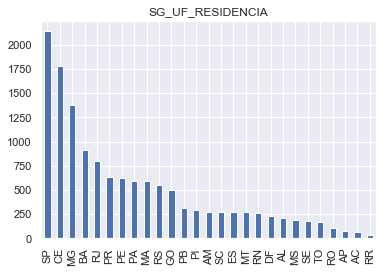

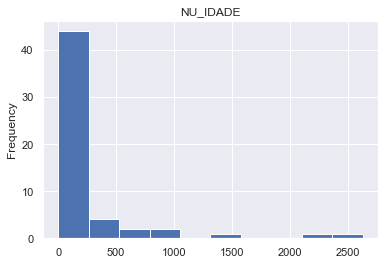

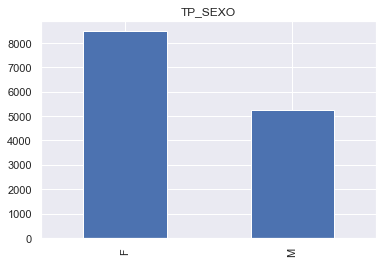

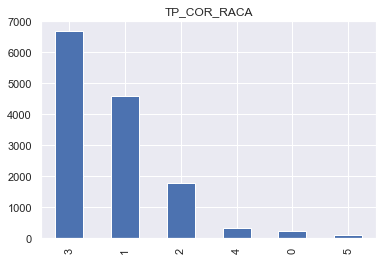

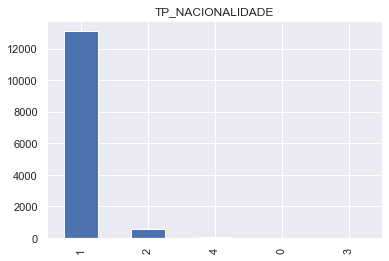

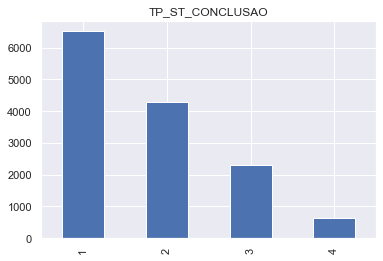

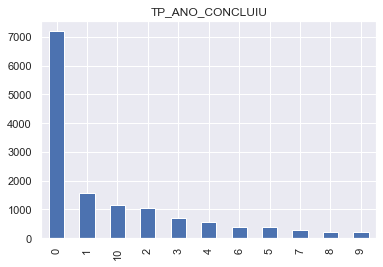

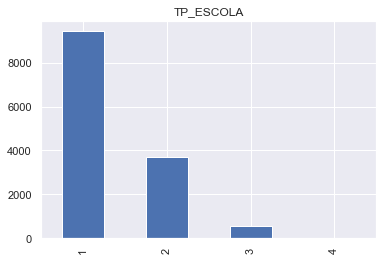

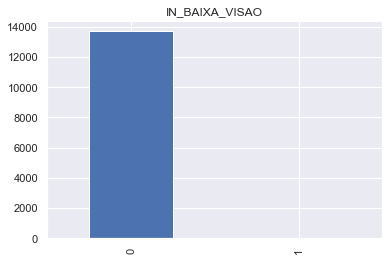

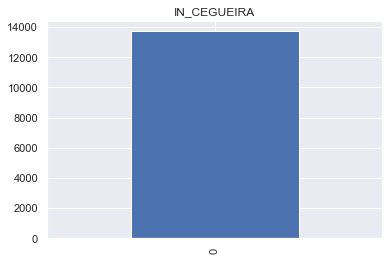

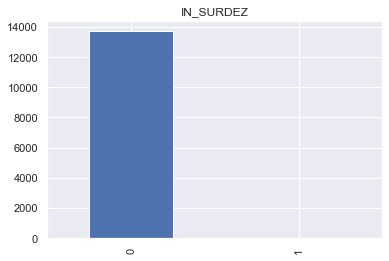

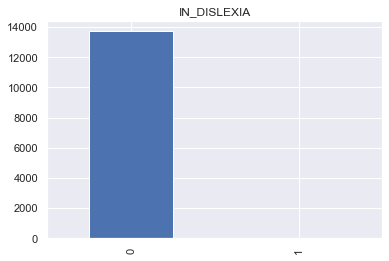

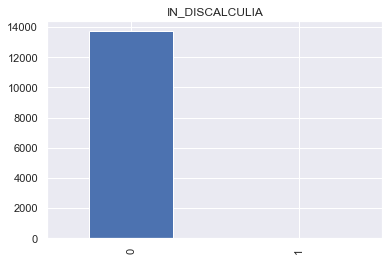

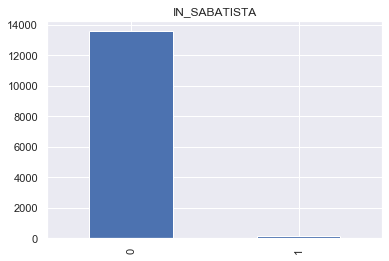

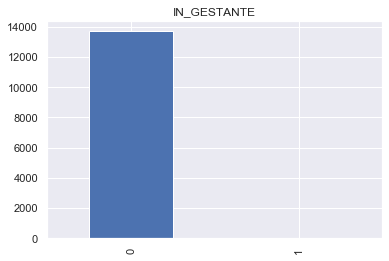

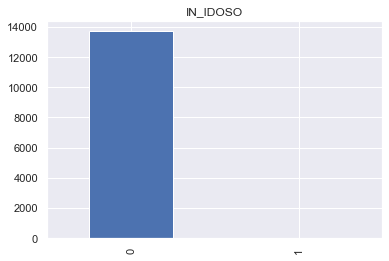

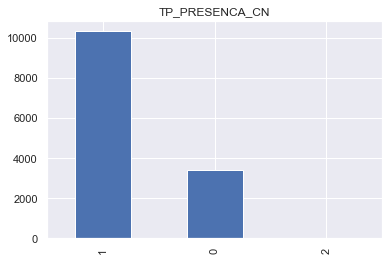

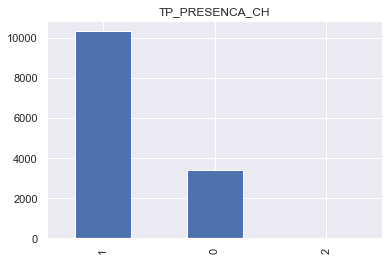

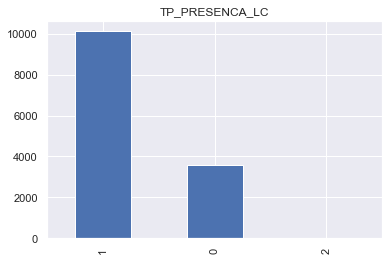

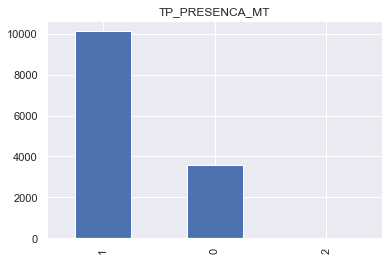

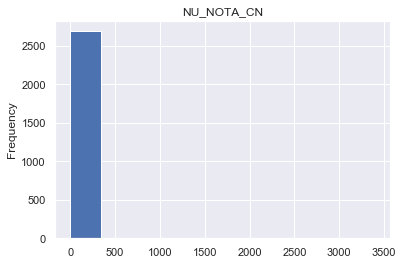

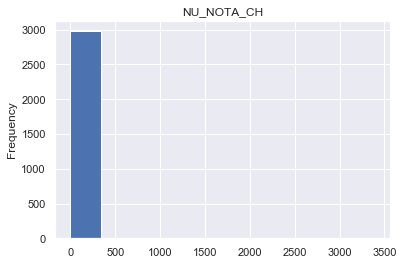

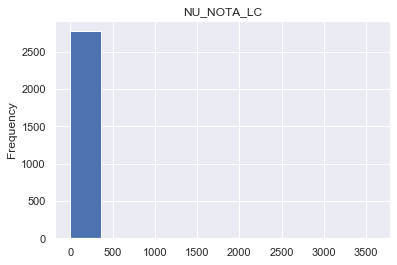

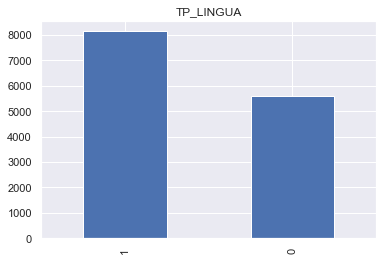

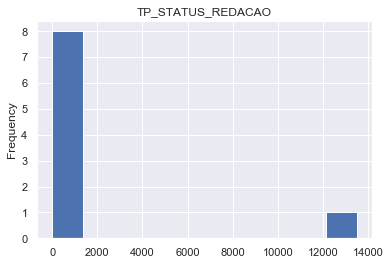

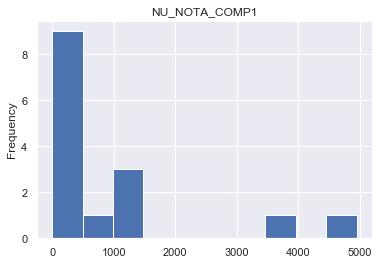

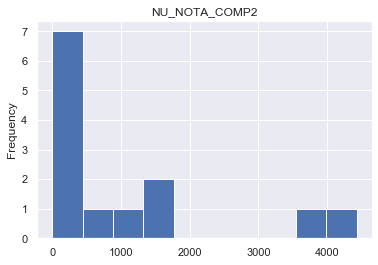

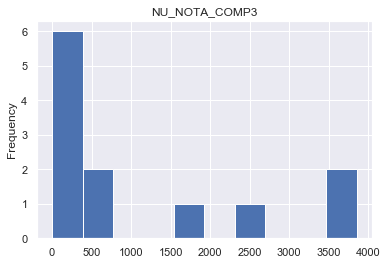

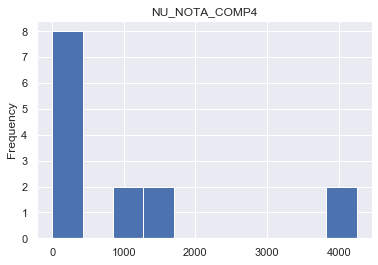

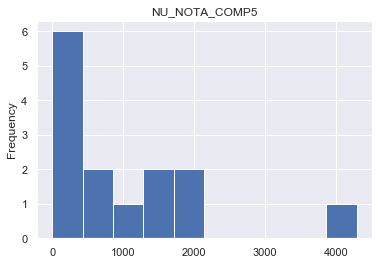

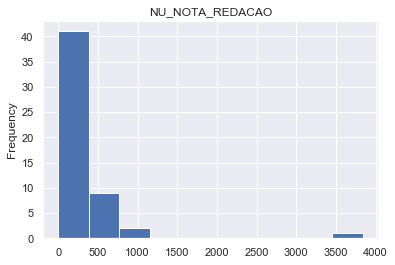

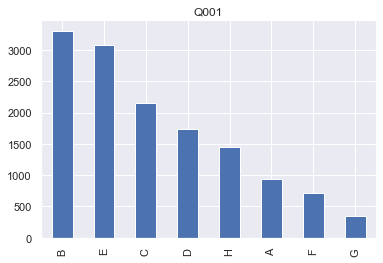

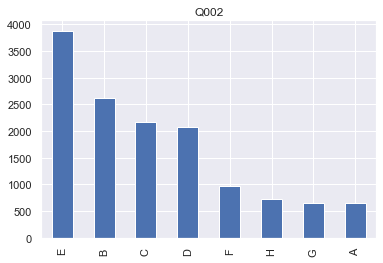

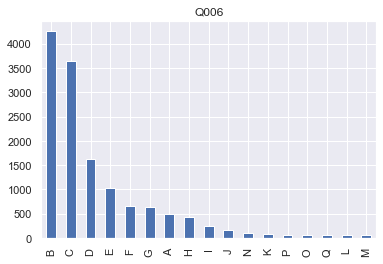

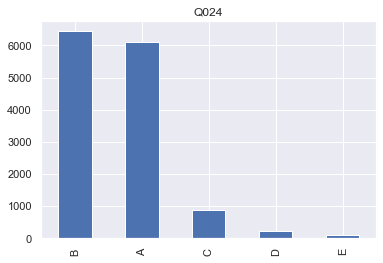

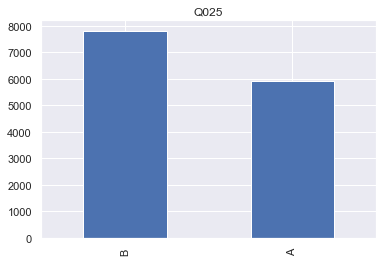

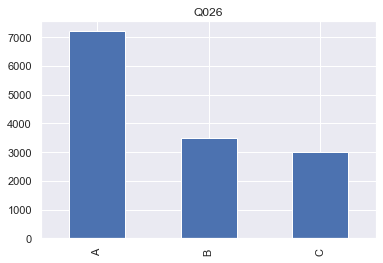

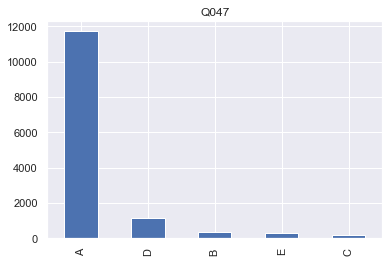

In [18]:
for coluna in enem_data.columns:
    if enem_data[coluna].dtype == 'object':
        enem_data[coluna].value_counts().plot(kind = "bar")
        plt.title(coluna)
        plt.show()
        
    else:
        enem_data[coluna].value_counts().plot(kind = "hist")
        plt.title(coluna)
        plt.show()

In [19]:
bad_dist = ['TP_NACIONALIDADE','IN_BAIXA_VISAO','IN_CEGUEIRA','IN_SURDEZ','IN_DISLEXIA','IN_DISCALCULIA','IN_SABATISTA','IN_GESTANTE','IN_IDOSO','TP_STATUS_REDACAO',]
enem_data = enem_data.drop(columns = bad_dist)
enem_desafio = enem_desafio.drop(columns = bad_dist)

## ANÁLISE DE CORRELAÇÕES ENTRE FEATURES

In [20]:
#para correlação entre x e y categórica
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

#para correlação entre x e y, sendo um contínuo e outro categórico
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [21]:
coef  = []
for coluna in enem_data.columns:
    if enem_data[coluna].dtype == 'object':
        print(coluna,': ',cramers_v(enem_data[coluna],Y))
        coef.append(cramers_v(enem_data[coluna],Y))
    else:
        print(coluna,': ',correlation_ratio(enem_data[coluna],Y))
        coef.append(correlation_ratio(enem_data[coluna],Y))

SG_UF_RESIDENCIA :  0.19922378358785886
NU_IDADE :  0.7649240898015887
TP_SEXO :  0.025292277839948692
TP_COR_RACA :  0.036174819540850486
TP_ST_CONCLUSAO :  0.8597601574095438
TP_ANO_CONCLUIU :  0.3666048042614111
TP_ESCOLA :  0.2597088349428169
TP_PRESENCA_CN :  0.09430210253530523
TP_PRESENCA_CH :  0.09430210253530523
TP_PRESENCA_LC :  0.09250762254351062
TP_PRESENCA_MT :  0.09250762254351062
NU_NOTA_CN :  0.4746620420677527
NU_NOTA_CH :  0.4970653275152605
NU_NOTA_LC :  0.478737152088548
TP_LINGUA :  0.03515493693537154
NU_NOTA_COMP1 :  0.09432081451096706
NU_NOTA_COMP2 :  0.095750560674417
NU_NOTA_COMP3 :  0.0985186976273134
NU_NOTA_COMP4 :  0.09576452868848344
NU_NOTA_COMP5 :  0.09452704023557813
NU_NOTA_REDACAO :  0.11193191459463896
Q001 :  0.10247929809396839
Q002 :  0.10049127834177692
Q006 :  0.08773571030485725
Q024 :  0.03124058465368552
Q025 :  0.004790993129687806
Q026 :  0.2865933991434973
Q047 :  0.08335800847142719


In [22]:
exp = pd.DataFrame({'colunas':enem_data.columns,'Correlação':coef})
exp.sort_values(by = 'Correlação',ascending = False)

,colunas,Correlação
4,TP_ST_CONCLUSAO,0.859760
1,NU_IDADE,0.764924
12,NU_NOTA_CH,0.497065
13,NU_NOTA_LC,0.478737
11,NU_NOTA_CN,0.474662
5,TP_ANO_CONCLUIU,0.366605
26,Q026,0.286593
6,TP_ESCOLA,0.259709
0,SG_UF_RESIDENCIA,0.199224
20,NU_NOTA_REDACAO,0.111932


Diante disso, apenas as 6 features mais relevantes serão utilizadas no modelo.

In [23]:
feat_useful = ['TP_ST_CONCLUSAO','NU_IDADE','NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC','TP_ANO_CONCLUIU']

In [24]:
enem_data = enem_data[feat_useful]
enem_desafio = enem_desafio[feat_useful]

In [25]:
enem_data.isna().sum(axis=0)

TP_ST_CONCLUSAO    0
NU_IDADE           0
NU_NOTA_CH         0
NU_NOTA_CN         0
NU_NOTA_LC         0
TP_ANO_CONCLUIU    0
dtype: int64

In [26]:
enem_desafio.isna().sum(axis=0)

TP_ST_CONCLUSAO    0
NU_IDADE           0
NU_NOTA_CH         0
NU_NOTA_CN         0
NU_NOTA_LC         0
TP_ANO_CONCLUIU    0
dtype: int64

As features TP_ST_CONCLUSAO e TP_ANO_CONCLUIU precisam de uma transformação, mesmo que contenham números, são features categóricas.

In [27]:
encod_feat= ['TP_ST_CONCLUSAO','TP_ANO_CONCLUIU']

In [28]:
encod_feats = pd.get_dummies(enem_data[encod_feat],drop_first=True)
encod_feats2 = pd.get_dummies(enem_desafio[encod_feat],drop_first=True)

In [29]:
enem_data = enem_data.drop(columns=encod_feat)
enem_desafio = enem_desafio.drop(columns=encod_feat)

In [30]:
enem_data = pd.concat([enem_data,encod_feats],axis=1)
enem_desafio = pd.concat([enem_desafio,encod_feats2,],axis=1)

In [31]:
enem_desafio.isna().sum(axis=0)

NU_IDADE              0
NU_NOTA_CH            0
NU_NOTA_CN            0
NU_NOTA_LC            0
TP_ST_CONCLUSAO_2     0
TP_ST_CONCLUSAO_3     0
TP_ST_CONCLUSAO_4     0
TP_ANO_CONCLUIU_1     0
TP_ANO_CONCLUIU_2     0
TP_ANO_CONCLUIU_3     0
TP_ANO_CONCLUIU_4     0
TP_ANO_CONCLUIU_5     0
TP_ANO_CONCLUIU_6     0
TP_ANO_CONCLUIU_7     0
TP_ANO_CONCLUIU_8     0
TP_ANO_CONCLUIU_9     0
TP_ANO_CONCLUIU_10    0
dtype: int64

Com isso, a parte de pré-processamento de dados está finalizada, o passo será aplicar o modelo de machine learning.

## APLICAR MODELO DE MACHINE LEARNING 

De início, o dataset enem_data será separado em treino e teste. (OBS: Não confundir este teste aplicado para verificar eficácia do modelo com o dataset enem_desafio.

In [32]:
X_data = enem_data.values
X_desafio = enem_desafio.values

Agora será dividido o dataset entre teste e treino:

In [33]:
from sklearn.model_selection import train_test_split

Está sendo utilizado 80% para treino, e 20% para teste:

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y,test_size = 0.2)

Nesta etapa, serão utilizados os seguintes algorítmos de classificação: Logistic Regression, Naive Bayes, KNearest Neighbors, DecisionTree Regressor e RandomForest

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,recall_score

In [36]:
#CRIANDO LISTA DE ALGORITMOS
algs = [LogisticRegression(),GaussianNB(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]

In [37]:
#VERIFICAR QUAL ALGORÍTMO É MELHOR
acc  =[] #acurácia
f1 = [] #f1score
rec = []#recall
for algoritmo in algs:
    print("Ajustando modelo: ",algoritmo)
    algoritmo.fit(X_train,Y_train)
    print("Aplicando predições: ",algoritmo)
    Y_pred = algoritmo.predict(X_test)
    print("Calculando metricas: ",algoritmo)
    acc.append(accuracy_score(Y_test,Y_pred))
    f1.append(f1_score(Y_test,Y_pred))
    rec.append(recall_score(Y_test,Y_pred))

Ajustando modelo:  LogisticRegression()


c:\users\laca2i\codenation\venv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Aplicando predições:  LogisticRegression()
Calculando metricas:  LogisticRegression()
Ajustando modelo:  GaussianNB()
Aplicando predições:  GaussianNB()
Calculando metricas:  GaussianNB()
Ajustando modelo:  KNeighborsClassifier()
Aplicando predições:  KNeighborsClassifier()
Calculando metricas:  KNeighborsClassifier()
Ajustando modelo:  DecisionTreeClassifier()
Aplicando predições:  DecisionTreeClassifier()
Calculando metricas:  DecisionTreeClassifier()
Ajustando modelo:  RandomForestClassifier()
Aplicando predições:  RandomForestClassifier()
Calculando metricas:  RandomForestClassifier()


In [38]:
Resultado = pd.DataFrame({"Algorítmo":algs,"Accuracy":acc,"F1_score":f1,"Recall":rec})

In [39]:
Resultado

,Algorítmo,Accuracy,F1_score,Recall
0,LogisticRegression(),0.997451,0.988942,0.984277
1,GaussianNB(),0.968318,0.879668,1.000000
2,KNeighborsClassifier(),0.886744,0.275058,0.185535
3,DecisionTreeClassifier(),0.995994,0.982622,0.977987
4,"(DecisionTreeClassifier(max_features='auto', r...",0.997087,0.987261,0.974843


Para obter o melhor algorítmo, será aplicado um coeficiente global, dado pelo produto das três métricas:

In [40]:
Resultado['Global_coef'] = Resultado['Accuracy']*Resultado['F1_score']*Resultado['Recall']

In [41]:
Resultado

,Algorítmo,Accuracy,F1_score,Recall,Global_coef
0,LogisticRegression(),0.997451,0.988942,0.984277,0.970911
1,GaussianNB(),0.968318,0.879668,1.000000,0.851798
2,KNeighborsClassifier(),0.886744,0.275058,0.185535,0.045253
3,DecisionTreeClassifier(),0.995994,0.982622,0.977987,0.957143
4,"(DecisionTreeClassifier(max_features='auto', r...",0.997087,0.987261,0.974843,0.959621


Com isso, o melhor algorítmo foi o RandomForestClassifier, com o maior coeficiente de rendimento global.

## FAZENDO PREDIÇÕES DO DATASET DO DESAFIO

In [42]:
Y_desafio = algoritmo.predict(X_desafio)

## IMPORTAR RESULTADOS PARA CSV 

In [43]:
import csv

In [44]:
with open('answer.csv','w',newline= '') as file:
    writer = csv.writer(file)
    writer.writerow(['NU_INSCRICAO','IN_TREINEIRO'])
    for i in range(0,len(Y_desafio)):
        writer.writerow([INSCRICAO[i],Y_desafio[i]])